In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

In [4]:
data=np.loadtxt('/home/gopikag/Documents/ML_exercise/Machine_Learning_teachbyDoing/logistic_regression_data.csv', delimiter=',',dtype=np.float64)
X,y=data[:,:-1], data[:,-1].reshape((-1,1))

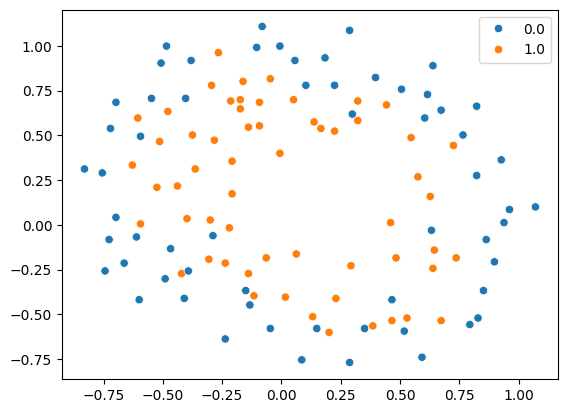

In [5]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y.flatten())
plt.show()

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def loss(theta,X,y):
    h=sigmoid(np.dot(X,theta))
    cos=-(np.sum(y*np.log(h))+np.sum((1-y)*np.log(1-h)))/len(y)
    return cos

In [8]:
def grad(theta, X,y):
    h=sigmoid(np.dot(X,theta))
    grad=np.dot(X.T,(h-y))/len(y)
    return grad

In [9]:
### Feature trick, power=order of polynomial
def expand_feature(x1,x2,power=2):
    ## expand 2D feature matrix to polynomial feature upto power
    new_x=np.ones((x1.shape[0],1))
    for i in range(1,power+1):
        for j in range(i+1):
            new_x=np.append(new_x,(x1**(i-j)*(x2**j)).reshape(-1,1),axis=1)
    return new_x


In [10]:
def predict(theta,X):
    return(sigmoid(np.dot(X,theta))>0.5).flatten()

In [11]:
def gradient_descent(X,y,theta,alpha,num_iters):
    m=len(y)
    costs=[]

    for _ in range(num_iters):
        h=sigmoid(np.dot(X,theta))
        theta-=alpha*np.dot(X.T,(h-y))/m
        costs.append(loss(theta,X,y))
    return theta, costs

In [12]:
### implement logistic regression
def logistic_regression(X,y,power=2,alpha=0.01,num_iters=100):
    X=expand_feature(X[:,0],X[:,1],power=power)
    theta=np.zeros((X.shape[1],1),dtype=np.float64)
    theta,costs=gradient_descent(X,y,theta,alpha,num_iters)
    predicted=predict(theta,X)
    return predicted, theta, costs

In [13]:
#### decide the polynomial power in the feature and number of iterations
power, num_iters=20,20000
predicted, theta,costs=logistic_regression(X,y,power=power,alpha=0.6,num_iters=num_iters)
print('The accuracy is {:.2f}%'.format(sum(predicted==y.flatten())/len(y)*100))

The accuracy is 85.59%


/tmp/ipykernel_10752/649594499.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j]=np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1),power=power),theta)


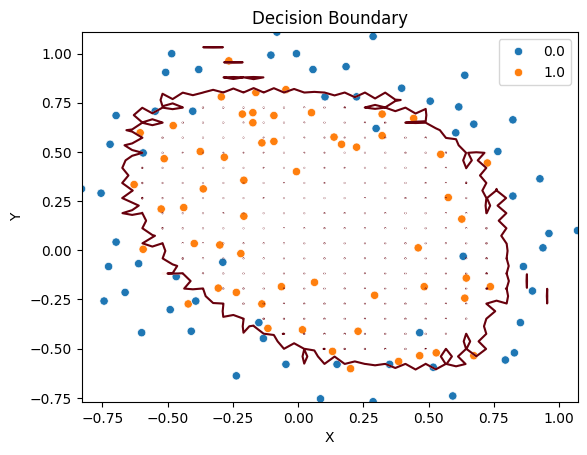

In [14]:
#### Visualizze the classifiers
u=np.linspace(min(X[:,0]),max(X[:,0]),50)
v=np.linspace(min(X[:,1]),max(X[:,1]),50)

z=np.zeros((len(u),len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1),power=power),theta)
    z=np.transpose(z)


plt.contour(u,v,z,[0,0.01],cmap='Reds')
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [15]:
### Regularization: Cost function
def cost_reg(theta,X,y,lam=0):
    h=sigmoid(np.dot(X,theta))
    theta1=theta.copy()  ### theta1 is same as theta but with no bias term there
    theta1[0]=0
    cos=-(np.sum(y*np.log(h))+np.sum((1-y)*np.log(1-h)))/len(y) + lam*np.sum(theta1*theta1)/len(y)
    return cos

In [16]:
def grad_reg(theta, X,y,lam=0):
    h=sigmoid(np.dot(X,theta))
    theta1=0
    theta1[0]=0
    grad=np.dot(X.T,(h-y)+2*lam*theta1)/len(y)
    return grad

In [17]:
def gradient_descent_reg(X,y,theta,alpha,lam=0,num_iters=100):
    m=len(y)
    costs=[]

    for _ in range(num_iters):
        h=sigmoid(np.dot(X,theta))
        theta1=theta.copy()
        theta1[0]=0
        theta-=alpha*(np.dot(X.T,(h-y)) +2*lam*theta1)/m
        costs.append(cost_reg(theta,X,y))
    return theta, costs

In [18]:
### implement logistic regression
def logistic_regression_reg(X,y,power=2,alpha=0.01,lam=0,num_iters=100):
    X=expand_feature(X[:,0],X[:,1],power=power)
    theta=np.zeros((X.shape[1],1),dtype=np.float64)
    theta,costs=gradient_descent_reg(X,y,theta,alpha,lam,num_iters)
    predicted=predict(theta,X)
    return predicted, theta, costs

In [19]:
#### decide the polynomial power in the feature and number of iterations
power, num_iters=20,20000
lam=1
predicted, theta,costs=logistic_regression_reg(X,y,power=power,alpha=0.6,lam=lam,num_iters=num_iters)
print('The accuracy is {:.2f}%'.format(sum(predicted==y.flatten())/len(y)*100))

The accuracy is 82.20%


/tmp/ipykernel_10752/649594499.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j]=np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1),power=power),theta)


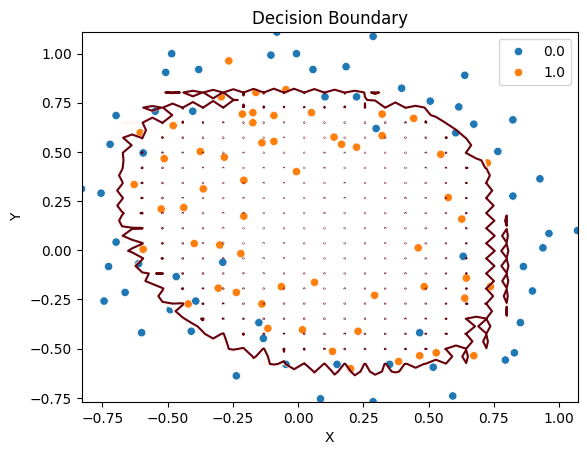

In [20]:
#### Visualizze the classifiers
u=np.linspace(min(X[:,0]),max(X[:,0]),50)
v=np.linspace(min(X[:,1]),max(X[:,1]),50)

z=np.zeros((len(u),len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=np.dot(expand_feature(u[i].reshape(1,-1),v[j].reshape(1,-1),power=power),theta)
    z=np.transpose(z)


plt.contour(u,v,z,[0,0.01],cmap='Reds')
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y.flatten())
plt.title('Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()